# Plot helicity calculations

In [50]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as axisartist
import matplotlib.patches as patches

In [51]:
from scipy.constants import proton_mass as m_i
from scipy.constants import elementary_charge as q_e
import scipy.fftpack as fft
from scipy.signal import boxcar, convolve

In [52]:
dates_by_volume = {'joint': '2017-03-21-11-15',
                   'magnetic': '2017-03-21-14-28'}

volumes = {}

for key in dates_by_volume.keys():
    date = dates_by_volume[key]
    path = '../../output/helicity/' + date + '/'
    magnetic_helicity = np.loadtxt(path + 'magnetic_helicity.txt')
    relative_magnetic_helicity = np.loadtxt(path + 'relative_magnetic_helicity.txt')
    time = np.arange(0, 250) * 0.068
    helicities = { 'magnetic': magnetic_helicity,
                  'relative_magnetic': relative_magnetic_helicity,
                  'time': time}
    volumes[key] = helicities

# Plot gyration path

In [53]:
def gyration_path(axes=None, circles=None, step=25):
    centroid_file = '/home/jensv/rsx/jens_analysis/output/centroid_fitting/2016-08-12/field_nulls.txt'
    field_nulls = np.loadtxt(centroid_file)
    
    if not axes:
        fig, axes = plt.subplots(1, 1)
    
    x_min, x_max = -0.022, 0.024
    y_min, y_max = -0.017, 0.018
    measurement_box = patches.Rectangle((x_min, y_min), x_max-x_min, y_max-y_min,
                                    color='grey', alpha=0.5)

    x_min, x_max = -0.032, 0.028 
    y_min, y_max = -0.022, 0.032
    helicity_box = patches.Rectangle((x_min, y_min), x_max-x_min, y_max-y_min,
                                     color='grey', alpha=0.3)
    
    bx_by_x_min = -0.024
    bx_by_x_max = 0.024
    bx_by_y_min = -0.073
    bx_by_y_max = 0.041
    bx_by_measurement_box = patches.Rectangle((bx_by_x_min, bx_by_x_min), 
                                              bx_by_x_max - bx_by_x_min,
                                              bx_by_y_max - bx_by_y_min,
                                              color='grey', alpha=0.1)
    
    
    axes.add_patch(measurement_box)
    axes.add_patch(helicity_box)
    axes.add_patch(bx_by_measurement_box)
    colormap = np.linspace(0, 1, 250)
    axes.scatter(field_nulls[:, 0], field_nulls[:, 1], c=colormap)


    #axes.text(-0.008, -0.015, r'$0 \mu s$')
    #axes.text(0.03, -0.003, r'$%2.1f \mu s$' % (0.068*56))
    #axes.text(-0.03, 0.017, r'$%2.1f \mu s$' % (0.068*208))

    if circles:
        for i, field_null in enumerate(field_nulls[::step]):
            colormap = np.linspace(1, 0, np.round(250./step))
            circle = patches.Circle(field_null, radius=0.02, facecolor='none', 
                                    edgecolor=str(colormap[i]), alpha=0.5)
            axes.scatter(field_null[0], field_null[1], c='red')
            axes.add_patch(circle)
    axes.set_xlabel('x [m]')
    axes.set_ylabel('y [m]')
    axes.set_xlim(-0.03, 0.04)
    axes.set_aspect('equal')
    axes.invert_xaxis()
    return axes

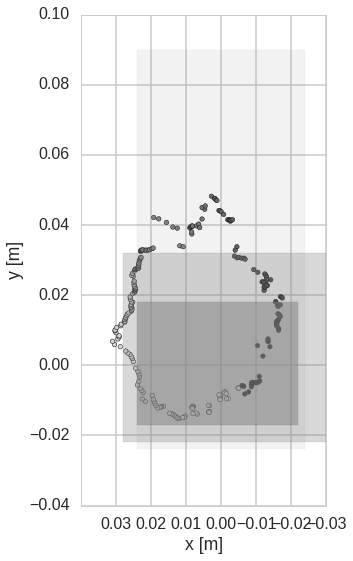

In [54]:
gyration_path()

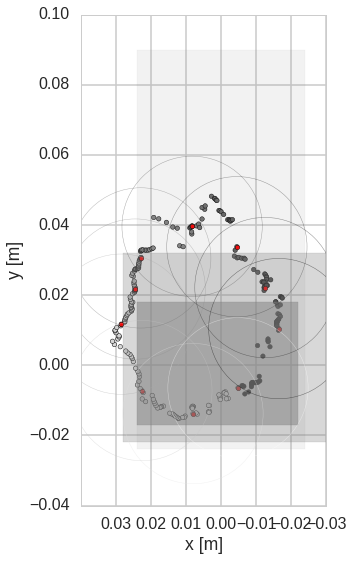

In [55]:
gyration_path(circles=True)

In [56]:
centroid_file = ("/home/jensv/rsx/jens_analysis/output/"
                 "centroid_fitting/2016-08-12/field_nulls.txt")
field_nulls = np.loadtxt(centroid_file)
print np.where(field_nulls[:, 0] > 0.028)[0]*0.068
print np.where(field_nulls[:, 1] > 0.032)[0]*0.068

[ 4.352  4.42   4.488  4.556  4.624  4.692  4.76   4.828  4.896  4.964
  5.032  5.1  ]
[  8.636   8.704   8.772   8.84    8.908   8.976   9.044   9.112   9.18
   9.248   9.316   9.384   9.452   9.52    9.588   9.656   9.724   9.792
   9.86    9.928   9.996  10.064  10.132  10.2    10.268  10.336  10.404
  10.472  10.54   10.608  10.676  10.744  10.812  10.88   10.948  11.016
  11.084  11.152  11.22   11.288  11.356  11.424  11.492  11.56   11.628
  11.696  11.764  11.832  11.9    11.968]


## magnetic helicity

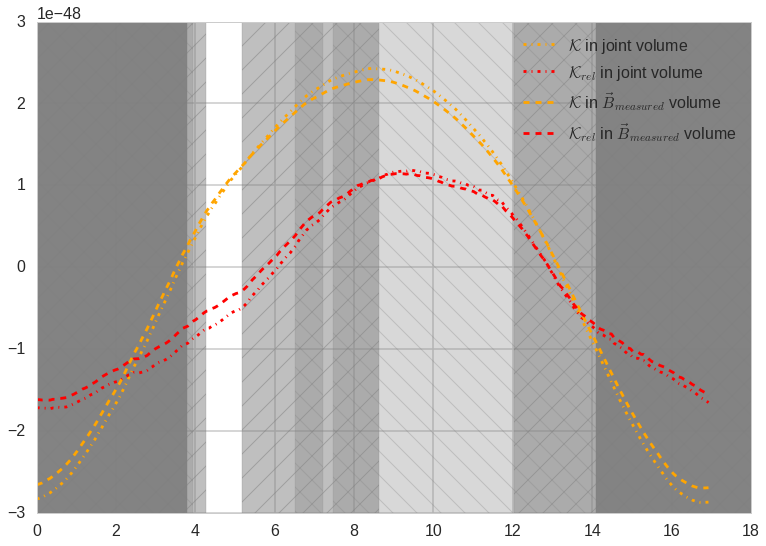

In [61]:
plt.plot(time, volumes['joint']['magnetic'], 
         label=r'$\mathcal{K}$ in joint volume', 
         color='orange', ls='-.')
plt.plot(time, volumes['joint']['relative_magnetic'], 
         label=r'$\mathcal{K}_{rel}$ in joint volume', 
         color='red', ls='-.')
plt.plot(time, volumes['magnetic']['magnetic'],
         label=r'$\mathcal{K}$ in $\vec{B}_{measured}$ volume', 
         color='orange', ls='--')
plt.plot(time, volumes['magnetic']['relative_magnetic'],
         label=r'$\mathcal{K}_{rel}$ in $\vec{B}_{measured}$ volume', 
         color='red', ls='--')
    

in_joint_box_1 = patches.Rectangle((0, -1000), 3.8, 2000., 
                                   alpha=0.9, color='grey')
in_joint_box_2 = patches.Rectangle((14.1, -1000), 19, 2000., 
                                   alpha=0.9, color='grey')
in_b_vec_box_1 = patches.Rectangle((0, -1000), 4.28, 2000.,
                                   alpha=0.5, color='grey', hatch='/')
in_b_vec_box_2 = patches.Rectangle((5.17, -1000), 8.64-5.17, 2000., 
                                   alpha=0.5, color='grey', hatch='/')
in_b_vec_box_3 = patches.Rectangle((12.04, -1000), 19, 2000., 
                                   alpha=0.5, color='grey', hatch='/')
in_bxby_box_1 = patches.Rectangle((0, -1000), 3.944, 2000., 
                                  alpha=0.3, color='grey', hatch='\\')
in_bxby_box_2 = patches.Rectangle((6.52, -1000), 7.208-6.52, 2000, 
                                  alpha=0.3, color='grey', hatch='\\')
in_bxby_box_3 = patches.Rectangle((7.48, -1000), 19, 2000., 
                                  alpha=0.3, color='grey', hatch='\\')
axes = plt.gca()
axes.add_patch(in_joint_box_1)
axes.add_patch(in_joint_box_2)
axes.add_patch(in_b_vec_box_1)
axes.add_patch(in_b_vec_box_2)
axes.add_patch(in_b_vec_box_3)
axes.add_patch(in_bxby_box_1)
axes.add_patch(in_bxby_box_2)
axes.add_patch(in_bxby_box_3)

plt.legend()